## Automatic Image Quality Assesment

No-reference image quality assessment does not require a base image to evaluate image quality, the only information that the algorithm receives is a distorted image whose quality is being assessed.
Blind methods are mostly comprised of two steps. The first step calculates features that describe the image’s structure and the second step finds the patterns among the features to human opinion. TID2008 is a famous database created following a methodology that describes how to measure human opinion scores from referenced images. It is widely used to compare the performance of IQA algorithms.

## Blind/referenceless image spatial quality evaluator (BRISQUE)

BRISQUE is a model that only uses the image pixels to calculate features (other methods are based on image transformation to other spaces like wavelet or DCT). It is demonstrated to be highly efficient as it does not need any transformation to calculate its features.
BRISQUE relies on spatial Natural Scene Statistics (NSS) model of locally normalized luminance coefficients in the spatial domain, as well as the model for pairwise products of these coefficients.

In [7]:
import numpy as np
from skimage import io, img_as_float
import imquality.brisque as brisque
import cv2
import PIL
from IPython.display import Image
from matplotlib import pyplot as plt
from PIL import Image as im

## Original Image

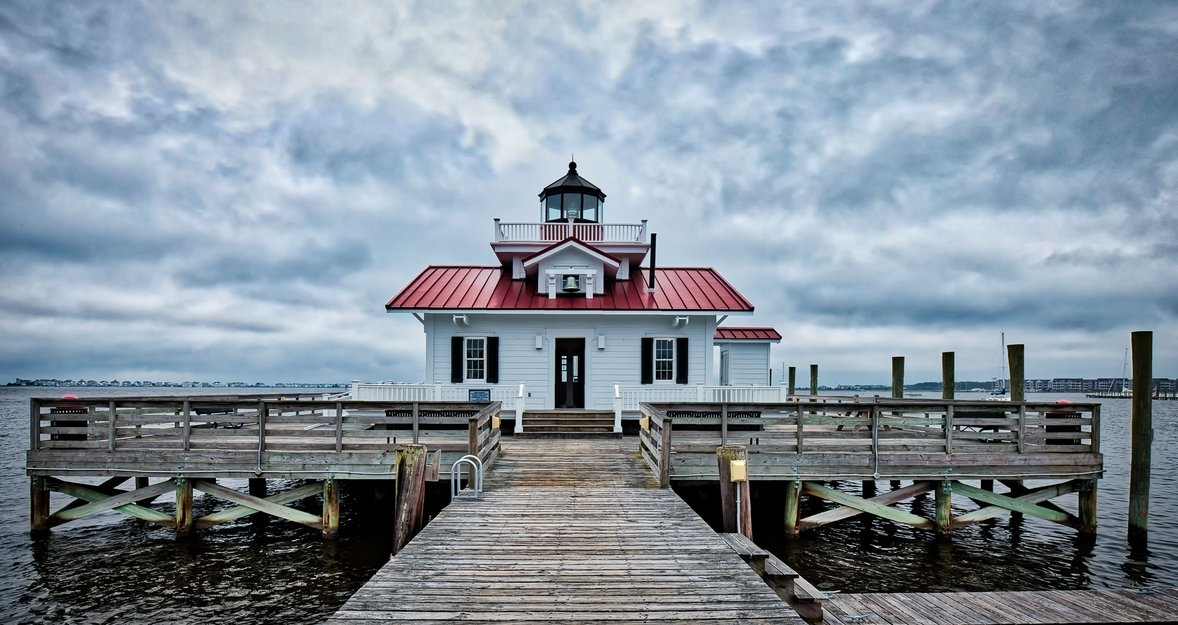

In [44]:
Image(filename=r'D:\Daiict Edu\Thesis Work\sample1.jpg') 

In [79]:
# GrayScaling the image
main_image = np.array(im.open(r'D:\Daiict Edu\Thesis Work\sample1.jpg'))
main_image = cv2.cvtColor(main_image,cv2.COLOR_RGB2GRAY)
cv2.imwrite(r'D:\Daiict Edu\Thesis Work\grayscale.jpg',main_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

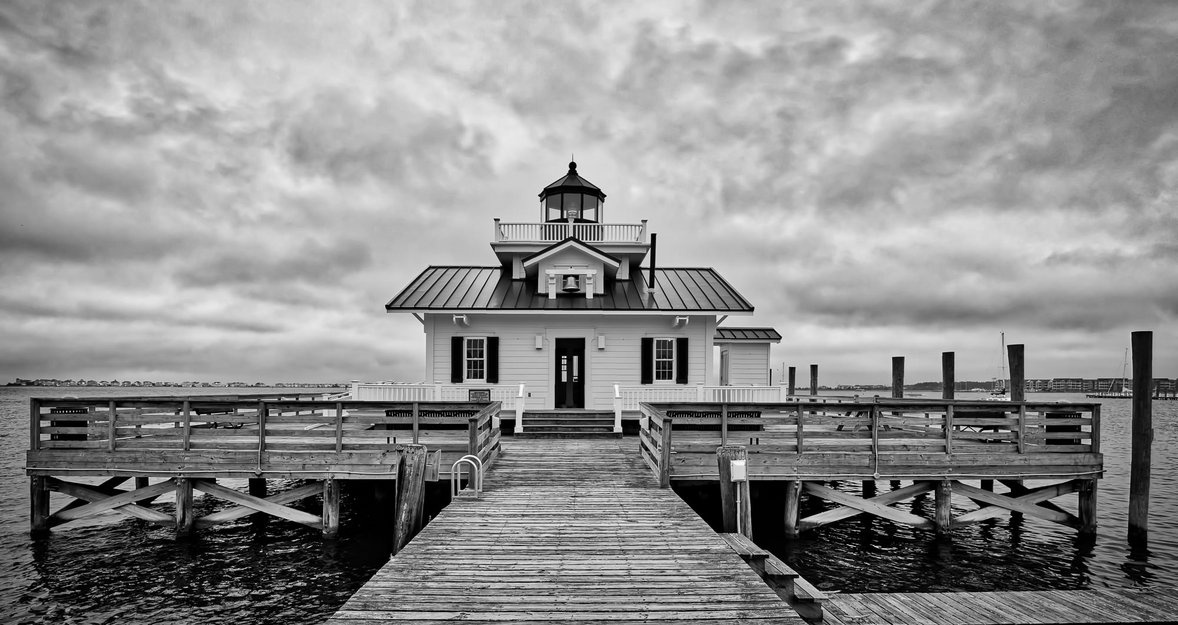

In [80]:
Image(filename=r'D:\Daiict Edu\Thesis Work\grayscale.jpg') 

In [81]:
main_image = np.array(im.open(r'D:\Daiict Edu\Thesis Work\sample1.jpg'))
score = brisque.score(main_image)
print("Brisque score = ", score)

Brisque score =  25.199480110371468


## Creat a Noisy Image

In [82]:
main_image = cv2.cvtColor(main_image,cv2.COLOR_RGB2GRAY)

In [83]:
gaussian = np.random.normal(0, 10, (main_image.shape[0],main_image.shape[1])) 
noisy_image = np.zeros(main_image.shape, np.float32)
noisy_image = main_image + gaussian
noisy_image = noisy_image.astype(np.uint8)

In [84]:
noisy_image.shape,gaussian.shape

((625, 1178), (625, 1178))

In [85]:
cv2.imwrite(r'D:\Daiict Edu\Thesis Work\noisyimage.jpg',noisy_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

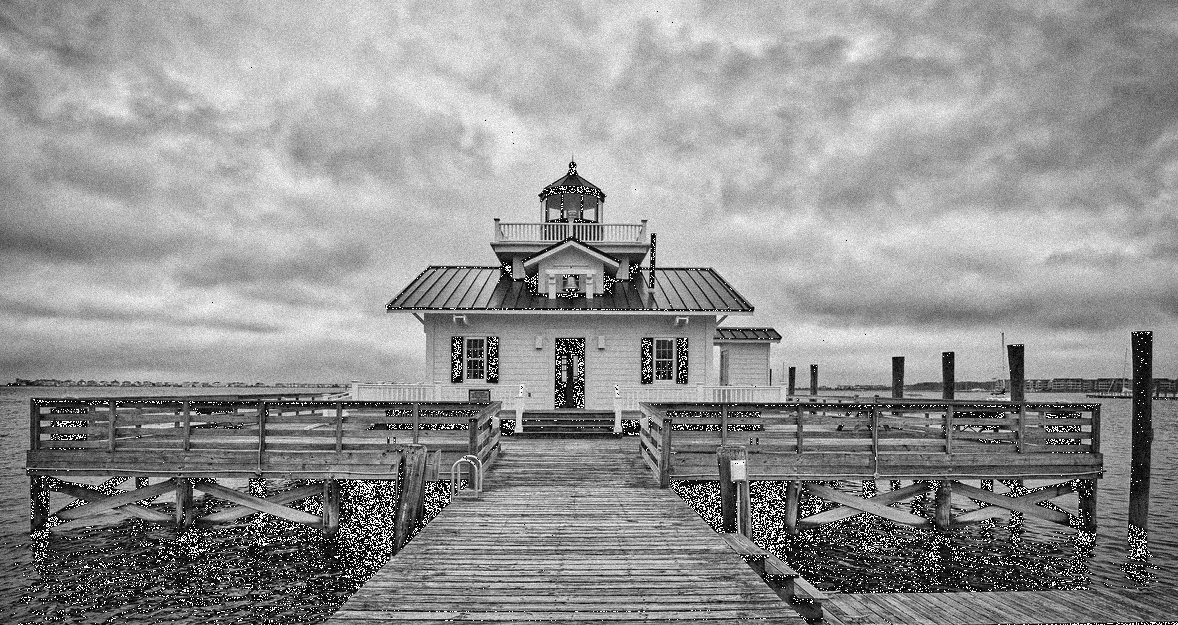

In [86]:
Image(filename=r'D:\Daiict Edu\Thesis Work\noisyimage.jpg') 

In [87]:
score = brisque.score(noisy_image)
print("Brisque score = ", score)

Brisque score =  128.1484020181135
